# Análise de ML - Modelo de Regressão

## Análise Inicial - Dataset Housing Prices

In [1]:
## importando bibliotecas

import pandas as pd
import numpy as np

In [2]:
## lendo arquivo

df = pd.read_csv('housing.csv')

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
## verificando com mais detalhes a variável - string

df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


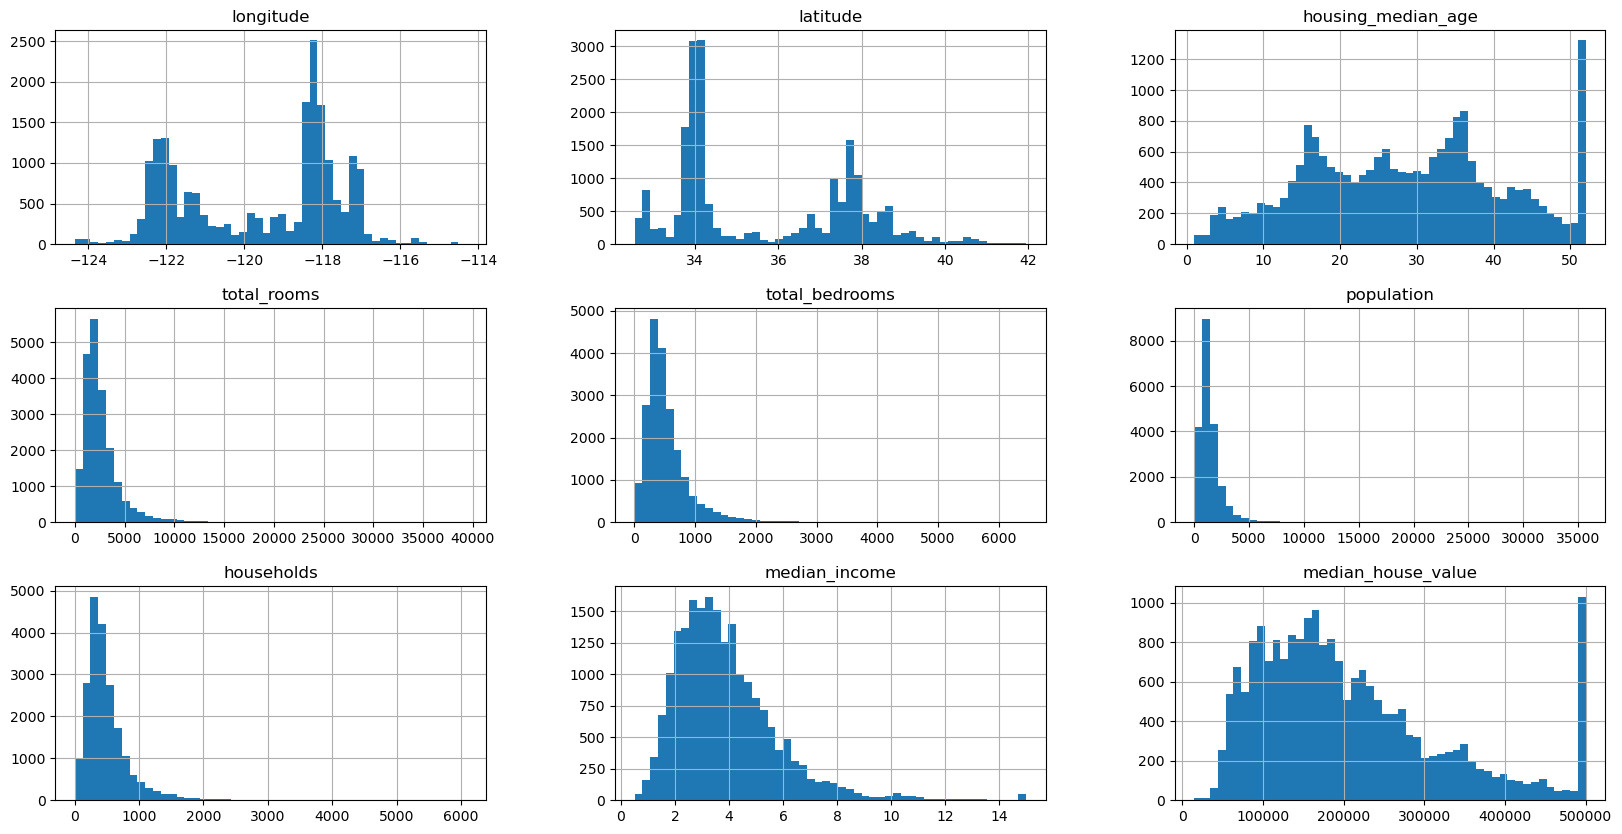

In [6]:
## checando os dados através de um histograma

%matplotlib inline
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,10))
plt.show()

### Checando Um Pouco Mais dos Dados

<Axes: xlabel='longitude', ylabel='latitude'>

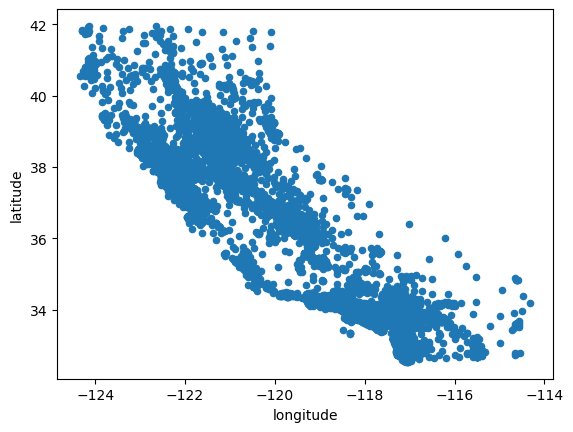

In [7]:
df.plot(kind='scatter', x='longitude', y='latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

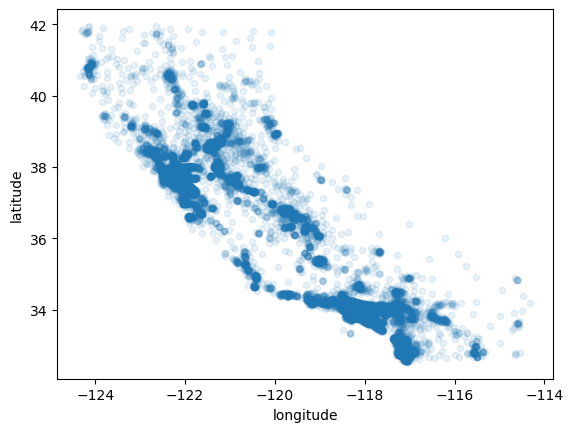

In [8]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

### Aprofundando a Visualização

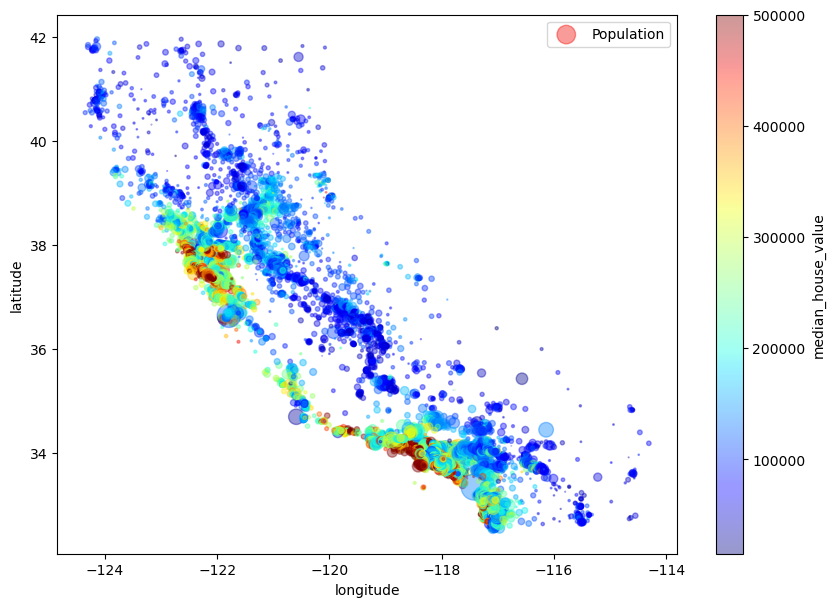

In [9]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
       s=df['population']/100, label='Population', figsize=(10,7),
       c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

### Buscando Correlações - Transformando uma Coluna Categórica

In [10]:
## Codificando Variáveis Categóricas usando one-hot-encoding

df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

## Calculando a Correlação de Spearman

correlation_matrix = df_encoded.corr(method='spearman')

## Exibindo a matriz de correlação 

print(correlation_matrix)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.879203           -0.150752   
latitude                    -0.879203  1.000000            0.032440   
housing_median_age          -0.150752  0.032440            1.000000   
total_rooms                  0.040120 -0.018435           -0.357162   
total_bedrooms               0.063879 -0.056636           -0.306544   
population                   0.123527 -0.123626           -0.283879   
households                   0.060020 -0.074299           -0.281989   
median_income               -0.009928 -0.088029           -0.147308   
median_house_value          -0.069667 -0.165739            0.074855   
ocean_proximity_<1H OCEAN    0.259843 -0.425229            0.056031   
ocean_proximity_INLAND      -0.012786  0.373859           -0.238075   
ocean_proximity_ISLAND       0.003560 -0.022495            0.014815   
ocean_proximity_NEAR BAY    -0.473995  0.350987            0.239482   
ocean_

In [11]:
## Codificando Variáveis Categóricas usando one-hot-encoding

df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

## Calculando a Correlação de Spearman

correlation_matrix = df_encoded.corr()

## Exibindo a matriz de correlação 

print(correlation_matrix)

                            longitude  latitude  housing_median_age  \
longitude                    1.000000 -0.924664           -0.108197   
latitude                    -0.924664  1.000000            0.011173   
housing_median_age          -0.108197  0.011173            1.000000   
total_rooms                  0.044568 -0.036100           -0.361262   
total_bedrooms               0.069608 -0.066983           -0.320451   
population                   0.099773 -0.108785           -0.296244   
households                   0.055310 -0.071035           -0.302916   
median_income               -0.015176 -0.079809           -0.119034   
median_house_value          -0.045967 -0.144160            0.105623   
ocean_proximity_<1H OCEAN    0.321121 -0.446969            0.045300   
ocean_proximity_INLAND      -0.055575  0.351166           -0.236645   
ocean_proximity_ISLAND       0.009446 -0.016572            0.017020   
ocean_proximity_NEAR BAY    -0.474489  0.358771            0.255172   
ocean_

In [12]:
## Checando o quanto cada variável se relaciona com o Valor Médio do Imóvel

correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

### Testando Combinações de Atributos - Criando Novas Variáveis

In [13]:
## criando três novas variavéis combinando as já existentes

df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [14]:
## checando a correlação novamente


df_encoded = pd.get_dummies(df, columns=['ocean_proximity'])

## Calculando a Correlação de Spearman

correlation_matrix = df_encoded.corr()

correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_<1H OCEAN     0.256617
ocean_proximity_NEAR BAY      0.160284
rooms_per_household           0.151948
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population_per_household     -0.023737
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
bedrooms_per_room            -0.255880
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64

## Começando Preparação Para ML

### Separando os Dados

In [15]:
from sklearn.model_selection import train_test_split

X =  df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dimensões do conjunto de treinamento (X_train):", X_train.shape)
print("Dimensões do conjunto de teste (X_test):", X_test.shape)
print("Dimensões do conjunto de treinamento (y_train):", y_train.shape)
print("Dimensões do conjunto de teste (y_test):", y_test.shape)

Dimensões do conjunto de treinamento (X_train): (16512, 12)
Dimensões do conjunto de teste (X_test): (4128, 12)
Dimensões do conjunto de treinamento (y_train): (16512,)
Dimensões do conjunto de teste (y_test): (4128,)


In [16]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [17]:
## Começando a tratar dos dados - separação das features em categóricas e numéricas para tratamento

numeric = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
categorical = ['ocean_proximity']

In [18]:
## Importando as bibliotecas

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

### 1- Etapa com Regressão Linear

In [19]:
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ]
)

In [20]:
## Vamos fazer primeiro ML dos dados com Regressão

from sklearn.linear_model import LinearRegression

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('regressor', LinearRegression())])

In [21]:
## checando a métrica

from sklearn.metrics import mean_squared_error

y_pred = pipeline.predict(X_test)

## Calculando o Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error: 4778547424.025885
Root Mean Squared Error (RMSE): 69127.03829924934


### 2- Etapa com Árvore de Decisão

In [22]:
X =  df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


numeric = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
categorical = ['ocean_proximity']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ]
)


from sklearn.tree import DecisionTreeRegressor

pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeRegressor())
])

pipeline_tree.fit(X_train, y_train)

y_pred_tree = pipeline_tree.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)

print(f'Mean Squared Error (Tree): {mse_tree}')
print(f'Root Mean Squared Error (Tree): {rmse_tree}')

Mean Squared Error (Tree): 4922297711.332122
Root Mean Squared Error (Tree): 70159.08858681191


## Utilizando GridSearchCV - Otimizando os Hiperparâmetros

In [23]:
## importando a biblioteca

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X =  df.drop('median_house_value', axis=1)
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household']
categorical = ['ocean_proximity']

numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ]
)

pipeline_tree_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', RandomForestRegressor())
])

## definindo o grid

param_grid = [
    {'tree__n_estimators': [3,10,30], 'tree__max_features': [2,4,6,8]},
    {'tree__bootstrap': [False], 'tree__n_estimators': [3,10], 'tree__max_features': [2,3,4]}
]

grid_search = GridSearchCV(pipeline_tree_reg, param_grid, cv=5, 
                          scoring = 'neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income',
                                                                          'rooms_per_household',
                                                                          'bedrooms_per_room',
                                                                          'population_per_household']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('tree', RandomForestRegressor())]),
             param_grid=[{'tree__max_features': [2, 4, 6, 8],
                          'tree__n_estimators': [3, 10, 30]},
                         {'tree__bootstrap': [False],
                          'tree__max_features': [2, 3, 4],
                          'tree__n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [24]:
## melhores parâmetros e melhores modelos

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)

{'tree__max_features': 6, 'tree__n_estimators': 30}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income',
                                                   'rooms_per_household',
                                                   'bedrooms_per_room',
                                                   'population_per_household']),
                  